### Import Moudules

In [105]:
# -*- coding: utf-8 -*-
%matplotlib inline
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import argparse
import base64
import os,glob
import numpy as np

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision.feature import Feature
from google.cloud.vision.feature import FeatureTypes

### Generate Client Instance

In [124]:
# Instantiates a client
vision_client = vision.Client()

# Client Vision APIs Usage
# https://googlecloudplatform.github.io/google-cloud-python/stable/vision-usage.html

### Path to FaceTime Camera Pictures

In [99]:
facetime_img_path = '/Users/Vuno/Pictures/Photo Booth 보관함/Pictures'

### Set Query Image

In [96]:
def show_img(file_name):
    img = Image.open(file_name)
    plt.imshow(np.asanyarray(img))
    plt.axis('off')

### Manual Detection

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'faces', 'from_api_repr', 'labels', 'landmarks', 'logos', 'properties', 'safe_searches', 'texts']


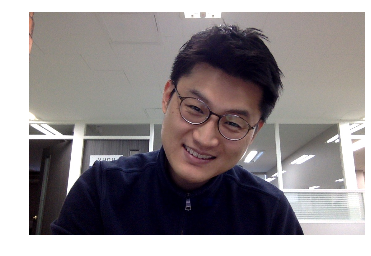

In [100]:
# The name of the image file to annotate
file_name = sorted(glob.glob(facetime_img_path+'/*.jpg'), key=os.path.getmtime)[-1]
#file_name = './test_images/running_dog.jpg'
show_img(file_name)

with open(file_name, 'rb') as image_file:
    content = image_file.read()
    image = vision_client.image(content=content)

features = [Feature(FeatureTypes.FACE_DETECTION, 5),
            Feature(FeatureTypes.LABEL_DETECTION, 10)]
annotations = image.detect(features)
print dir(annotations)

In [98]:
labels = annotations.labels
faces = annotations.faces

print ("---------Image Labeling Results--------")
for label in labels:
    print ("Label : %s, \t Confidence : %f" % (label.description, label.score))

print ("---------Face Detection Results--------")
for face_id, face in enumerate(faces):
    print ("Face : %d, \t Confidence : %f" % (face_id+1, face.detection_confidence))
    print ("\tJoy : %s" %(face.joy) )
    print ("\tSorrow : %s" %(face.sorrow) )
    print ("\tSurprise : %s" %(face.surprise) )
    print ("\tAnger : %s" %(face.anger) )

---------Image Labeling Results--------
Label : hair, 	 Confidence : 0.942832
Label : person, 	 Confidence : 0.927336
Label : glasses, 	 Confidence : 0.818062
Label : smile, 	 Confidence : 0.781331
Label : hairstyle, 	 Confidence : 0.719433
Label : vision care, 	 Confidence : 0.652306
Label : professional, 	 Confidence : 0.604334
---------Face Detection Results--------
Face : 1, 	 Confidence : 0.985663
	Joy : Likelihood.VERY_LIKELY
	Sorrow : Likelihood.VERY_UNLIKELY
	Surprise : Likelihood.VERY_UNLIKELY
	Anger : Likelihood.VERY_UNLIKELY


### Image Labeling

hair 0.94283205
person 0.92733645
glasses 0.81806195
smile 0.7813305
hairstyle 0.7194329


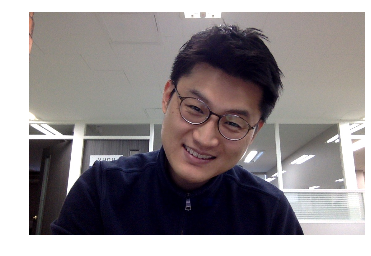

In [120]:
# The name of the image file to annotate
file_name = sorted(glob.glob(facetime_img_path+'/*.jpg'), key=os.path.getmtime)[-1]
#file_name = './test_images/running_dog.jpg'
show_img(file_name)

# Generate Client Instance
vision_client = vision.Client()

with open(file_name, 'rb') as image_file:
    content = image_file.read()
    image = vision_client.image(content=content)

# Request using Client API
labels = image.detect_labels(limit=5)

for label in labels:
    print label.description, label.score

### Face Detection

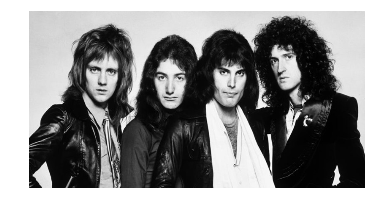

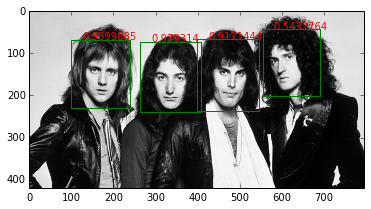

In [123]:
# The name of the image file to annotate
file_name = './test_images/queen.jpeg'
show_img(file_name)

with open(file_name, 'rb') as image_file:
    content = image_file.read()
    image = vision_client.image(content=content)
    
# Generate Client Instance
vision_client = vision.Client()

# Request using Client API
faces = image.detect_faces(limit=10)    

# Draw Face Detection Result
fig, ax = plt.subplots(1)
ax.imshow(np.asanyarray(Image.open(file_name)))

for face in faces:
    x0 = face.bounds.vertices[0].x_coordinate
    y0 = face.bounds.vertices[0].y_coordinate
    width = face.bounds.vertices[2].x_coordinate - x0
    height = face.bounds.vertices[2].y_coordinate - y0
    rect = patches.Rectangle((x0, y0), width, height, linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    ax.text((x0+width/5), y0, face.detection_confidence, fontsize=10, color='red')

plt.show()

### Landmark Detection

Eiffel Tower 0.6088542
48.858461
2.294351


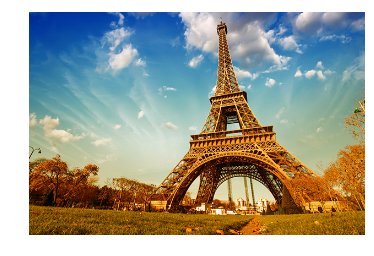

In [131]:
# The name of the image file to annotate
file_name = './test_images/effel_tower.jpg'
show_img(file_name)

with open(file_name, 'rb') as image_file:
    content = image_file.read()
    image = vision_client.image(content=content)

# Generate Client Instance
vision_client = vision.Client()
    
# Request using Client API
landmarks = image.detect_landmarks()

for landmark in landmarks:
    print landmark.description, landmark.score
    print landmark.locations[0].latitude
    print landmark.locations[0].longitude

### Logo Detection

Porsche Automobil Holding SE 0.6200063
Land Rover 0.61437154
Toyota 0.60578805
Nissan 0.6030766
Honda Arista 0.5735559
Chevrolet 0.5390867


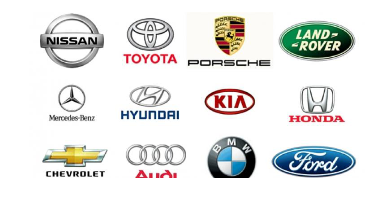

In [140]:
# The name of the image file to annotate
file_name = './test_images/global_logo.jpg'
show_img(file_name)

with open(file_name, 'rb') as image_file:
    content = image_file.read()
    image = vision_client.image(content=content)

# Generate Client Instance
vision_client = vision.Client()
    
# Request using Client API
logos = image.detect_logos(limit=20)

for logo in logos:
    print logo.description, logo.score

### Text Detection

ja
「大人になりたくないよ」
“I don' + ."
want to grow uP.
Wan
None
None
「 None
None
大人 None
None
に None
None
なり None
None
たく None
None
ない None
None
よ None
None
」 None
None
“ None
None
I None
None
don None
None
' None
None
+ None
None
. None
None
" None
None
want None
None
to None
None
grow None
None
uP None
None
. None
None
Wan None


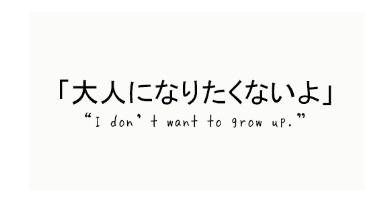

In [147]:
# The name of the image file to annotate
file_name = './test_images/korean_text.jpg'
#file_name = './test_images/japan_text.png'

show_img(file_name)

with open(file_name, 'rb') as image_file:
    content = image_file.read()
    image = vision_client.image(content=content)

# Generate Client Instance
vision_client = vision.Client()
    
# Request using Client API
texts = image.detect_text(limit=1)

for text in texts:
    print text.locale
    print text.description, text.score

### Safe Search Detection

Adult Likelihood : Likelihood.VERY_LIKELY
Spoof Likelihood : Likelihood.VERY_UNLIKELY
Medical Likelihood : Likelihood.VERY_UNLIKELY
Violence Likelihood : Likelihood.UNLIKELY


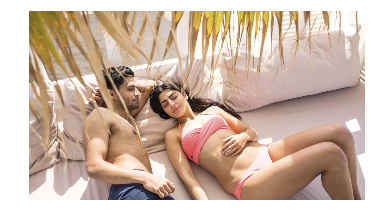

In [164]:
# The name of the image file to annotate

file_name = './test_images/search_adult.jpg'
#file_name = './test_images/search_spoof.jpg'
#file_name = './test_images/search_medical.jpg'
#file_name = './test_images/search_violent.jpg'

show_img(file_name)

with open(file_name, 'rb') as image_file:
    content = image_file.read()
    image = vision_client.image(content=content)

# Generate Client Instance
vision_client = vision.Client()

safe_search_results = image.detect_safe_search()

for search_result in safe_search_results:
    print "Adult Likelihood :", search_result.adult
    print "Spoof Likelihood :", search_result.spoof
    print "Medical Likelihood :", search_result.medical
    print "Violence Likelihood :", search_result.violence
